***

**Assignment 1:Basic Image Analysis Operations.** 

***

In [1]:
import numpy as np
import glob
import cv2 as cv
from skimage import io
import matplotlib.pyplot as plt
import ipyplot
from skimage import exposure
from scipy import signal
from skimage.util import random_noise
from scipy import ndimage
from scipy.ndimage import gaussian_filter
from scipy.ndimage import gaussian_laplace

%matplotlib inline
%run helper


***

**Task 2.1 Solution: Load the set of images and display them as Grayscale and rgb images. You are required to show these images ”inline” rather than creating a new window for every other image.** 

***



Task 2.1 Solution: Load the set of images and display them as Grayscale and rgb images. You are required to show these images ”inline” rather than creating a new window for every other image.


GrayScale Images



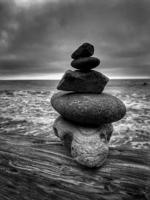
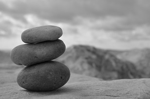
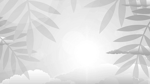
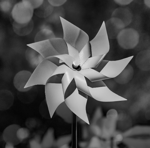
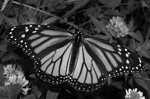
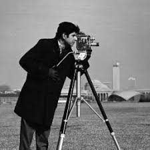
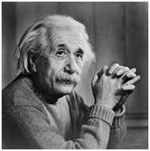
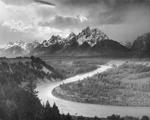
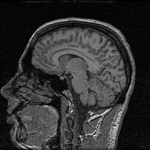


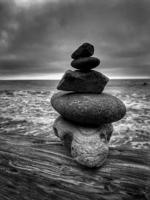
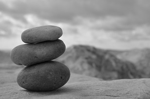
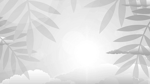
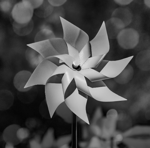
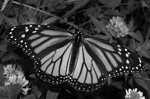
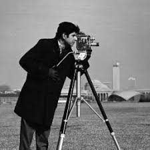
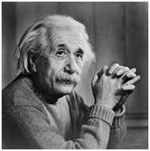
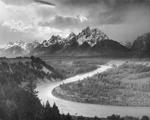
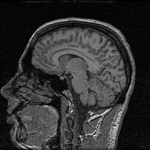

Color Images



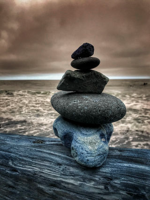
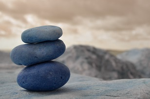
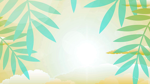
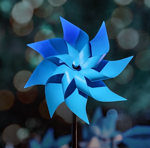
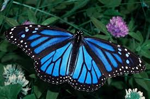
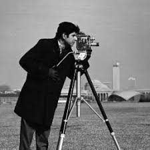
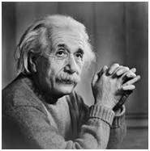
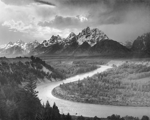
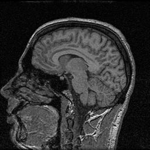


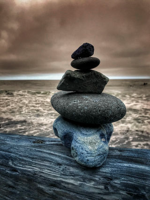
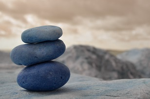
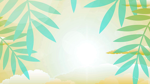
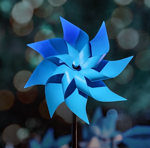
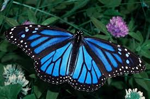
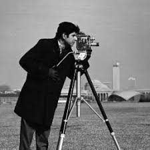
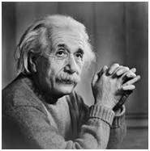
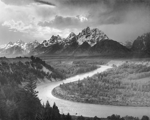
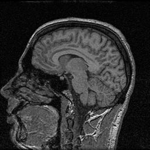

In [2]:
print("\n\nTask 2.1 Solution: Load the set of images and display them as Grayscale and rgb images. You are required to show these images ”inline” rather than creating a new window for every other image.\n\n")

grayscale_images = []
color_images= []
for img in glob.glob('Images/*.*'):
    grayscale_images.append(cv.imread(img,0))
    color_images.append(cv.imread(img,1))
    
print ("GrayScale Images")
ipyplot.plot_images(grayscale_images)
print ("Color Images")
ipyplot.plot_images(color_images)

***

**Task 2.2 Solution:Implement the function rgbExclusion() in the helper script, in which the input image is decomposed into the three channels: R, G and B and return the image excluding the specified channel. Display the results in notebook.** 

***



Task 2.2 Solution:Implement the function rgbExclusion() in the helper script, in which the input image is decomposed into the three channels: R, G and B and return the image excluding the specified channel. Display the results in notebook.




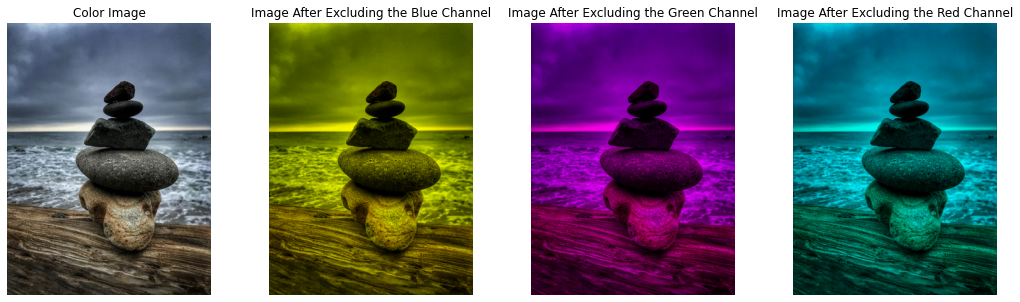

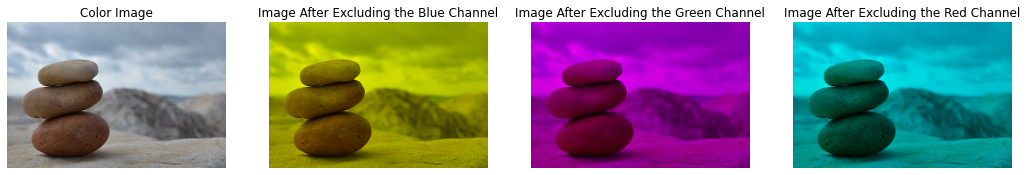

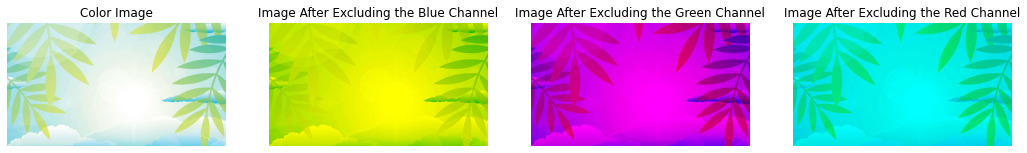

In [3]:
print("\n\nTask 2.2 Solution:Implement the function rgbExclusion() in the helper script, in which the input image is decomposed into the three channels: R, G and B and return the image excluding the specified channel. Display the results in notebook.\n\n")

for i in range(3):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18, 5))
   
    ax1.imshow(cv.cvtColor(color_images[i], cv.COLOR_BGR2RGB))
    ax1.set_title("Color Image")
    ax1.axis('off')
    
    ax2.imshow(cv.cvtColor(rgbExclusion(color_images[i],0), cv.COLOR_BGR2RGB))     # 0, for excuding the blue channel
    ax2.set_title("Image After Excluding the Blue Channel")
    ax2.axis('off')

    ax3.imshow(cv.cvtColor(rgbExclusion(color_images[i],1), cv.COLOR_BGR2RGB))     #1, for excuding the blue channel
    ax3.set_title("Image After Excluding the Green Channel")
    ax3.axis('off')
    
    ax4.imshow(cv.cvtColor(rgbExclusion(color_images[i],2), cv.COLOR_BGR2RGB))    #2, for excuding the blue channel
    ax4.set_title("Image After Excluding the Red Channel")
    ax4.axis('off')
plt.show()

***

**Task 2.3 Solution:Take at-least 3 images from given set and plot histograms before and after applying histogram equalization.Show these image inline format i.e. grayscale image –> display histogram –> apply histogram equalization–> display the equalized image and its histogram.**

***



 Task 2.3 solution:Take at-least 3 images from given set and plot histograms before and after applying histogram equalization.Show these image inline format i.e. grayscale image –> display histogram –> apply histogram equalization–> display the equalized image and its histogram.




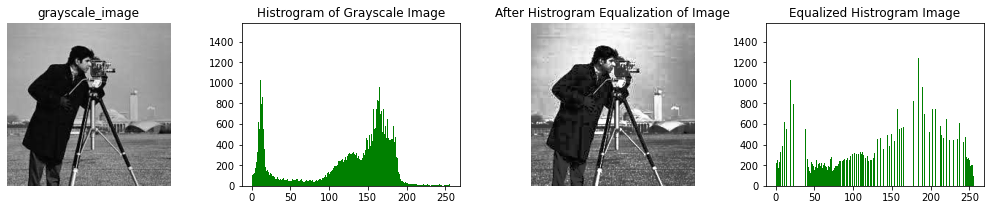

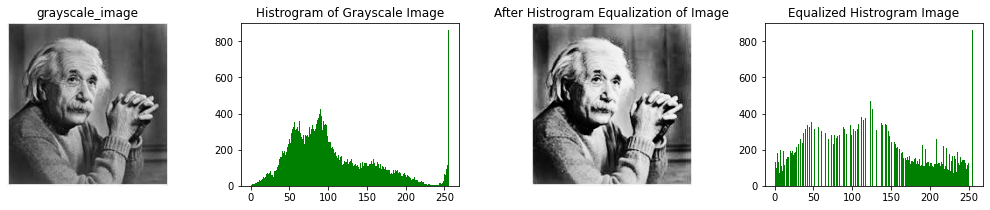

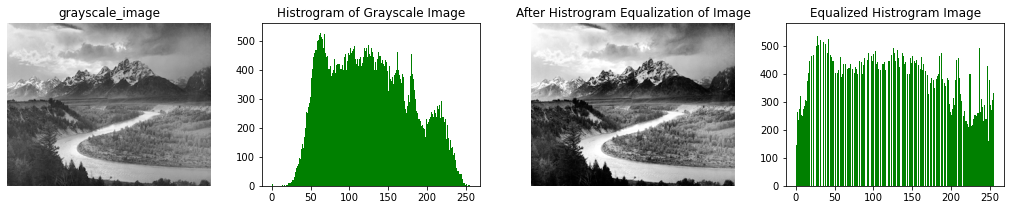

In [4]:

print("\n\n Task 2.3 solution:Take at-least 3 images from given set and plot histograms before and after applying histogram equalization.Show these image inline format i.e. grayscale image –> display histogram –> apply histogram equalization–> display the equalized image and its histogram.\n\n")
for i in range(3):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18, 3))
    
    
    ax1.imshow(grayscale_images[i+5],cmap='gray')
    ax1.set_title("grayscale_image")
    ax1.axis('off')
    
    ax2.hist(grayscale_images[i+5].flatten(),256,[0,256], color = 'g')
    ax2.set_title("Histrogram of Grayscale Image")
 
    equ=cv.equalizeHist(grayscale_images[i+5])
    ax3.imshow(equ,cmap='gray')    
    ax3.set_title("After Histrogram Equalization of Image")
    ax3.axis('off')
    
    ax4.hist(equ.flatten(),256,[0,256], color = 'g')   
    ax4.set_title("Equalized Histrogram Image")
plt.show()

***

**Task 2.4 Solution: Implementing the Convolution operation and Comparing the results of implemented function with the built-in function in python packages.** 

***


Image Sharpening by Using User- defined convolution_2d_image() Function and  built-in function convolve2d() from Scipy image processing library and laplacian kernel 




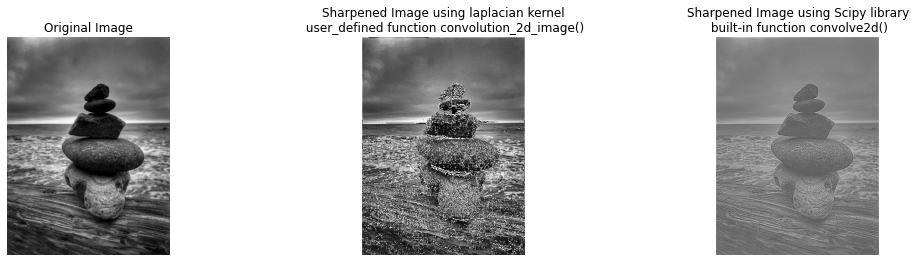

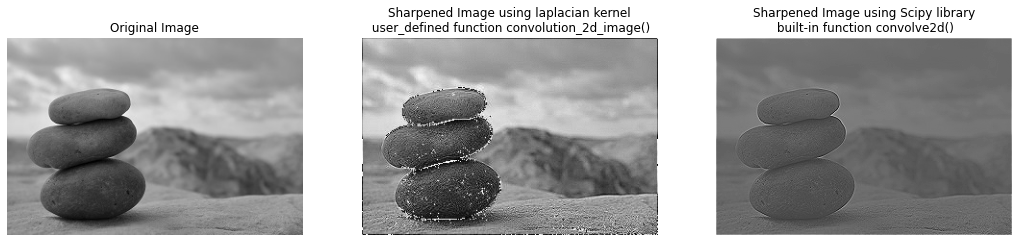



Image Blurring by Using User- defined convolution_2d_image() Function and  built-in function convolve2d() from Scipy image processing library and Box_Filter kernel 




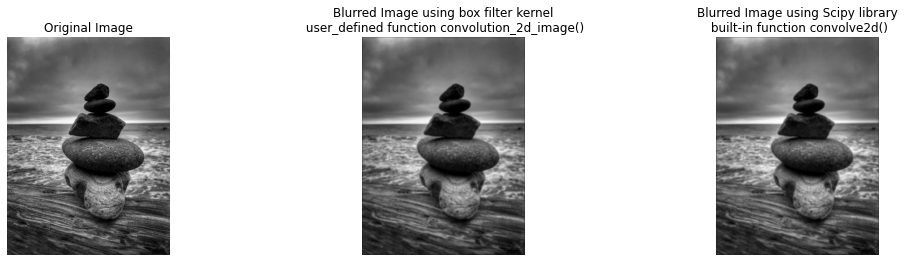

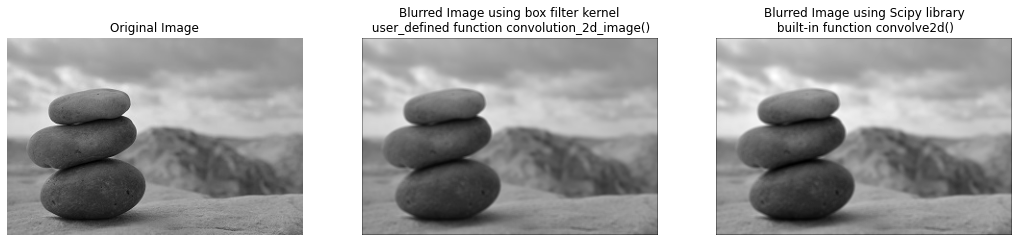

In [5]:
print("\nImage Sharpening by Using User- defined convolution_2d_image() Function and  built-in function convolve2d() from Scipy image processing library and laplacian kernel \n\n")
for i in range(2):
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18, 4))
   
    ax1.imshow(cv.cvtColor(grayscale_images[i], cv.COLOR_BGR2RGB))
    ax1.set_title("Original Image")
    ax1.axis('off')
    
    laplacian_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) # convolving laplacian kernel for sharpening image
    
    ax2.imshow(cv.cvtColor(convolution_2d_image(grayscale_images[i],laplacian_kernel), cv.COLOR_BGR2RGB))     #Calling the function convolution_2d_image
    ax2.set_title("Sharpened Image using laplacian kernel\n user_defined function convolution_2d_image()")
    ax2.axis('off')

    ax3.imshow(signal.convolve2d(grayscale_images[i],laplacian_kernel, 'same'),cmap='gray')     # Image Sharpening by Using built-in function from Scipy image processing library
    ax3.set_title("Sharpened Image using Scipy library\n built-in function convolve2d()")
    ax3.axis('off') 
plt.show()

print("\n\nImage Blurring by Using User- defined convolution_2d_image() Function and  built-in function convolve2d() from Scipy image processing library and Box_Filter kernel \n\n")

for i in range(2):
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18, 4))
   
    ax1.imshow(cv.cvtColor(grayscale_images[i], cv.COLOR_BGR2RGB))
    ax1.set_title("Original Image")
    ax1.axis('off')
    
    box_filter_kernel = np.ones((3,3),np.float32)/9 ## convolving Box filter kernel for blurring image
    ax2.imshow(cv.cvtColor(convolution_2d_image(grayscale_images[i],box_filter_kernel), cv.COLOR_BGR2RGB))     #Calling the function convolution_2d_image() using Box filter kernel
    ax2.set_title("Blurred Image using box filter kernel\n user_defined function convolution_2d_image()")
    ax2.axis('off')
    
    ax3.imshow(signal.convolve2d(grayscale_images[i],box_filter_kernel, 'same'),cmap='gray')     # Image Blurred by Using built-in function from Scipy image processing library
    ax3.set_title("Blurred Image using Scipy library\n built-in function convolve2d()")
    ax3.axis('off')
    
plt.show()


  
    

***

**Task 2.5: Load a couple of images from the given set:**<br>
       **Task 2.5.1 :Apply box filter using convolution, and display the resultant image.**<br>

***



Task 2.5.1 solution:Apply box filter using convolution, and display the resultant image.




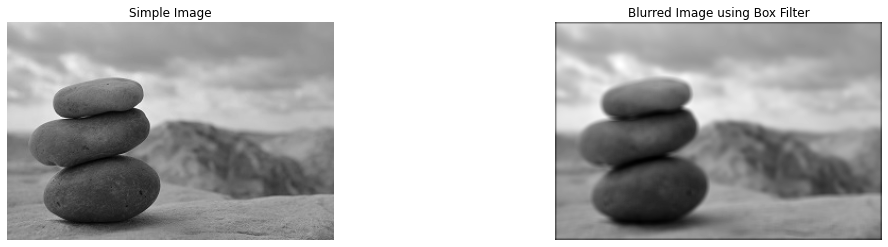

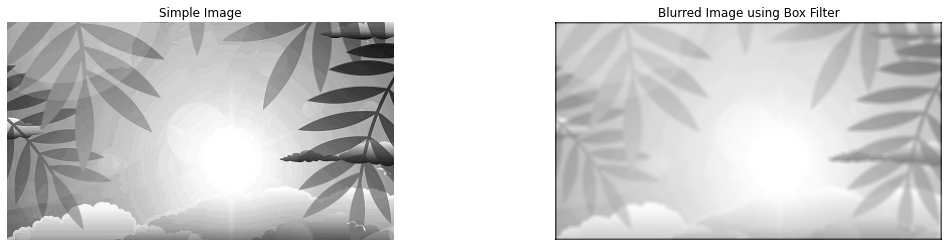

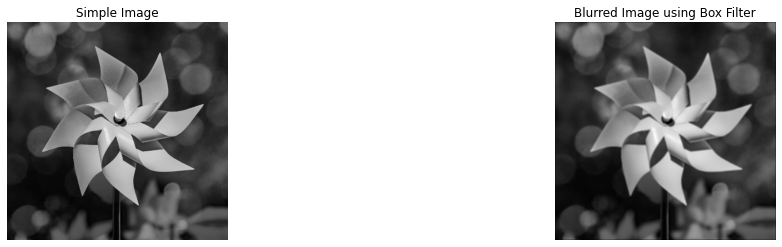

In [6]:
## Task 2.5.1 solution:Apply box filter using convolution, and display the resultant image.
print("\n\nTask 2.5.1 solution:Apply box filter using convolution, and display the resultant image.\n\n")

for i in range(3):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18, 4))   
    ax1.imshow(grayscale_images[i+1], cmap='gray')
    ax1.set_title("Simple Image")
    ax1.axis('off')
    
    ax2.imshow(box_filter(grayscale_images[i+1]),cmap='gray')
    ax2.set_title("Blurred Image using Box Filter")   
    ax2.axis('off')
plt.show()


***

**Task 2.5.2 :Apply Gaussian filter to the image, with varying sigma values.**<br>

***



2.5.2 solution:Apply Gaussian filter to the image, with varying sigma values.




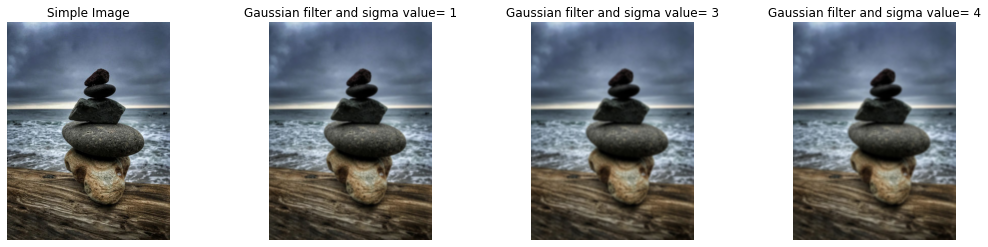

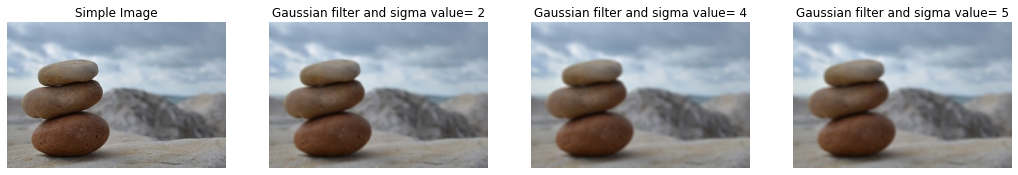

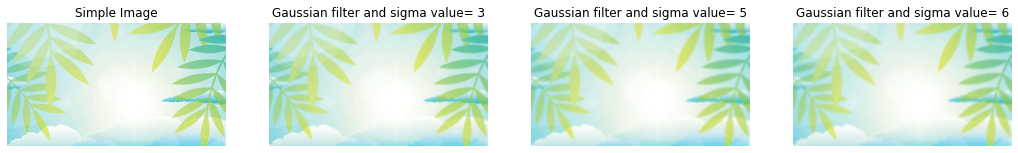

In [7]:
##Task 2.5.2 solution:Apply Gaussian filter to the image, with varying sigma values.
print("\n\n2.5.2 solution:Apply Gaussian filter to the image, with varying sigma values.\n\n")

for i in range(3):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(18, 4))   
    ax1.imshow(cv.cvtColor(color_images[i], cv.COLOR_BGR2RGB))
    ax1.set_title("Simple Image")
    ax1.axis('off')
    
    ax2.imshow(cv.cvtColor(cv.GaussianBlur(color_images[i], (5,5),sigmaX=1), cv.COLOR_BGR2RGB))
    ax2.set_title("Gaussian filter and sigma value= %i" % (i+1))  
    ax2.axis('off')
    
    ax3.imshow(cv.cvtColor(cv.GaussianBlur(color_images[i], (5,5),sigmaX=2+i), cv.COLOR_BGR2RGB))
    ax3.set_title("Gaussian filter and sigma value= %i" % (i+3))
    ax3.axis('off')
    
    ax4.imshow(cv.cvtColor(cv.GaussianBlur(color_images[i], (5,5),sigmaX=3+i), cv.COLOR_BGR2RGB))
    ax4.set_title("Gaussian filter and sigma value= %i" % (i+4))
    ax4.axis('off')
plt.show()



***

**Task 2.5.3 :Add Gausian Noise and Salt and Pepper Noise to them.**<br>
**Task 2.5.4 :Apply Gaussian Filter and Median Filters.**<br> 

***



Task 2.5.3 solution:Add Gausian Noise and Salt and Pepper Noise to them.
Task 2.5.4 solution:Apply Gaussian Filter and Median Filters.




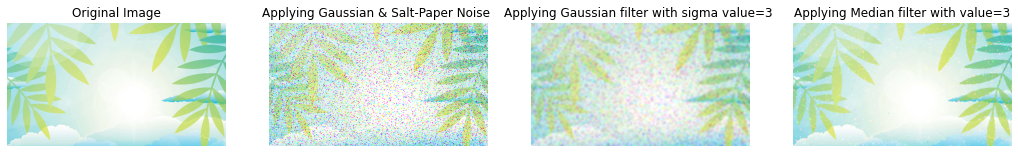

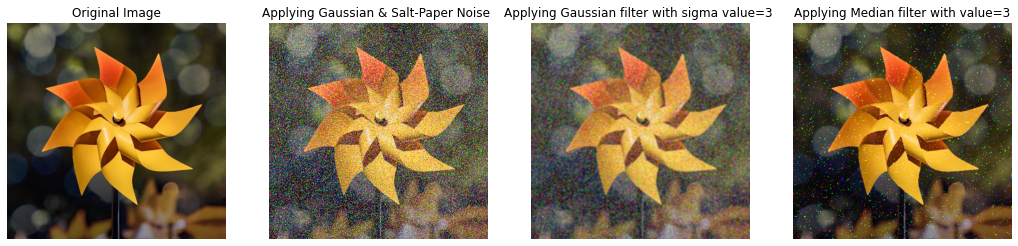

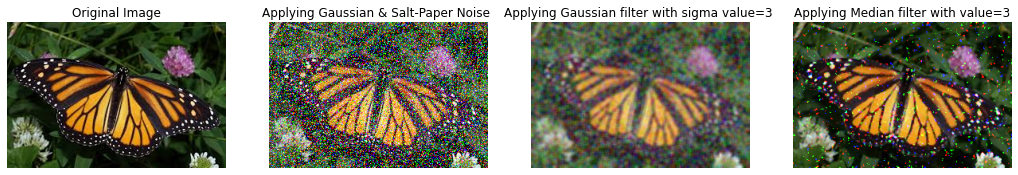

In [8]:
##  2.5.3 solution:Add Gausian Noise and Salt and Pepper Noise to them.
##Task 2.5.4 solution:Apply Gaussian Filter and Median Filters.
print("\n\nTask 2.5.3 solution:Add Gausian Noise and Salt and Pepper Noise to them.\nTask 2.5.4 solution:Apply Gaussian Filter and Median Filters.\n\n")

for i in range(3):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(18, 4))   
    ax1.imshow(cv.cvtColor(color_images[i+2], cv.COLOR_BGR2RGB))
    ax1.set_title("Original Image")
    ax1.axis('off')
    
    gaussian_noise_img= guassian_noise(color_images[i+2]) # Generate Gaussian noise
    sp_noise_img = sp_noise(gaussian_noise_img) # Generate salt & paper noise
    ax2.imshow(cv.cvtColor(sp_noise_img, cv.COLOR_BGR2RGB)) # displaying the image after applying Gaussian noise andsalt & paper noise
    ax2.set_title("Applying Gaussian & Salt-Paper Noise ")  
    ax2.axis('off')
    
    ax3.imshow(cv.cvtColor(cv.GaussianBlur(sp_noise_img, (5,5),sigmaX=3), cv.COLOR_BGR2RGB)) # applying Gaussian filter on Gaussian noise andsalt & paper noise image
    ax3.set_title("Applying Gaussian filter with sigma value=3 ")
    ax3.axis('off')
    
    ax4.imshow(cv.cvtColor(cv.medianBlur(sp_noise_img,3), cv.COLOR_BGR2RGB))# applying Median filter on Gaussian noise andsalt & paper noise image
    ax4.set_title("Applying Median filter with value=3")
    ax4.axis('off')
plt.show()

***

**Task 2.5.5 :Display mesh plots for different i) Gaussian filters, ii) First Order Derivative of Gaussian, iii)Laplacian of Gaussian; using different sigma values.**<br>

***    



Task 2.5.5 solution:Display mesh plots for different i) Gaussian filters, ii) First Order Derivative of Gaussian, iii)Laplacian of Gaussian; using different sigma values




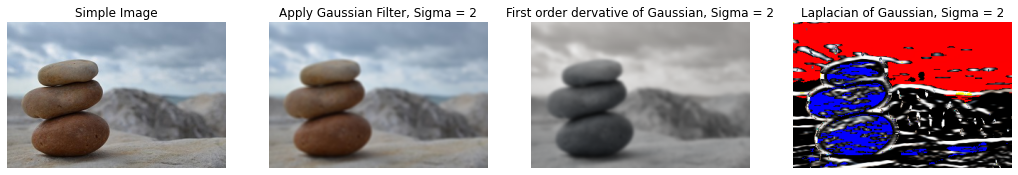

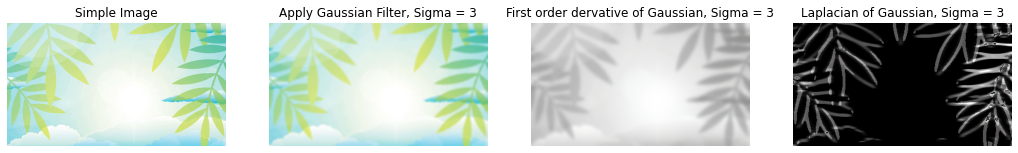

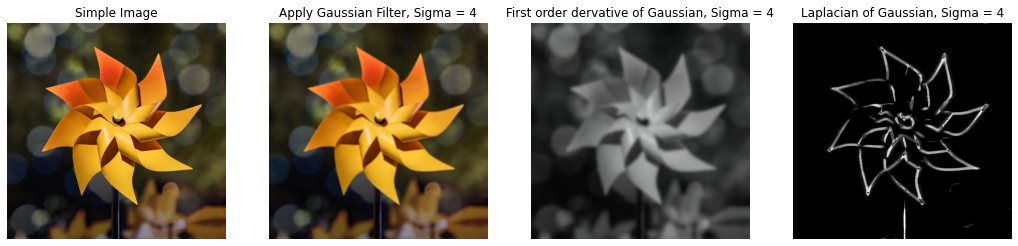

In [9]:

## Task 2.5.5 solution:Display mesh plots for different i) Gaussian filters, ii) First Order Derivative of Gaussian, iii)Laplacian of Gaussian; using different sigma values
print("\n\nTask 2.5.5 solution:Display mesh plots for different i) Gaussian filters, ii) First Order Derivative of Gaussian, iii)Laplacian of Gaussian; using different sigma values\n\n")

for i in range(3):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18, 5))
   
    ax1.imshow(cv.cvtColor(color_images[i+1], cv.COLOR_BGR2RGB))
    ax1.set_title("Simple Image")
    ax1.axis('off')
 
    ax2.imshow(cv.cvtColor(cv.GaussianBlur(color_images[i+1],(5,5),2+i), cv.COLOR_BGR2RGB)) #applying the gaussian filter
    title = "Apply Gaussian Filter, Sigma = %i" % (2+i)
    ax2.set_title(title)
    ax2.axis('off')

    ax3.imshow(gaussian_filter(color_images[i+1], sigma=2+i))   #applying the First Order Derivative of Gaussian
    title = "First order dervative of Gaussian, Sigma = %i" % (2+i)
    ax3.set_title(title)
    ax3.axis('off')

    ax4.imshow(gaussian_laplace(color_images[i+1], sigma=2+i))  #applying the Laplacian of Gaussian
    title = "Laplacian of Gaussian, Sigma = %i" % (2+i)
    ax4.set_title(title)
    ax4.axis('off')


***

**Task 2.6.1:Load a few images from given set and Apply Sobel operator, computer gradient magnitude and display the results (original image, gradient images and gradient magnitude image).** <br>


***



Task 2.6.1: Apply Sobel operator, computer gradient magnitude and display the results (original image, gradient images and gradient magnitude image




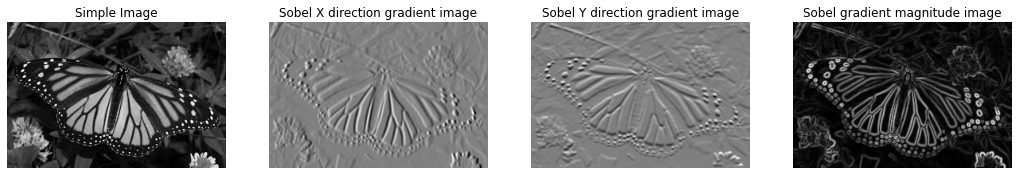

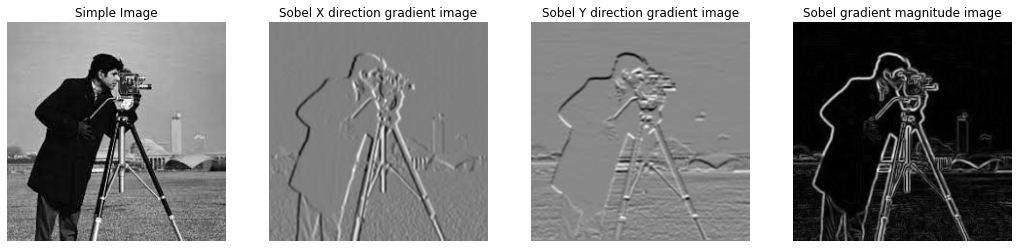

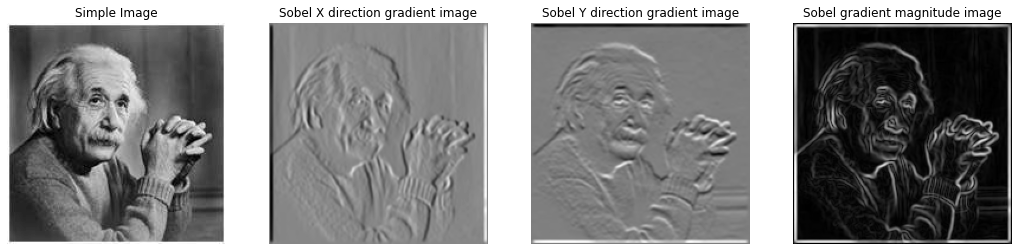

In [10]:
## Task 2.6.1:Load a few images from given set and Apply Sobel operator, computer gradient magnitude and display the results (original image, gradient images and gradient magnitude image).
print("\n\nTask 2.6.1: Apply Sobel operator, computer gradient magnitude and display the results (original image, gradient images and gradient magnitude image\n\n")


for i in range(3):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18, 5))
   
    ax1.imshow(grayscale_images[i+4],cmap='gray')
    ax1.set_title("Simple Image")
    ax1.axis('off')

    image_X=cv.Sobel(grayscale_images[i+4],cv.CV_64F,1,0,ksize=5)
    ax2.imshow(image_X,cmap='gray') #computing gradient X-direction magnitute
    ax2.set_title("Sobel X direction gradient image")
    ax2.axis('off')

    image_Y=cv.Sobel(grayscale_images[i+4],cv.CV_64F,0,1,ksize=5)
    ax3.imshow(image_Y,cmap='gray') #computing gradient Y-direction magnitute
    ax3.set_title("Sobel Y direction gradient image")
    ax3.axis('off')
    
    gradient_magnitude_img= np.sqrt(np.square( image_X) + np.square( image_Y)) #computing sobel gradient magnitute
    gradient_magnitude_img *= 255.0 / gradient_magnitude_img.max()
    
    ax4.imshow(gradient_magnitude_img,cmap='gray') 
    ax4.set_title("Sobel gradient magnitude image")
    ax4.axis('off')
plt.show()







***
**Task 2.6.2:Apply Laplacian of Gaussian, compute laplacian magnitude and display the results (original image,
filtered images and laplacian magnitude image).**
    
***



Task 2.6.2 solution:Apply Laplacian of Gaussian, compute laplacian magnitude and display the results (original image,filtered images and laplacian magnitude image).




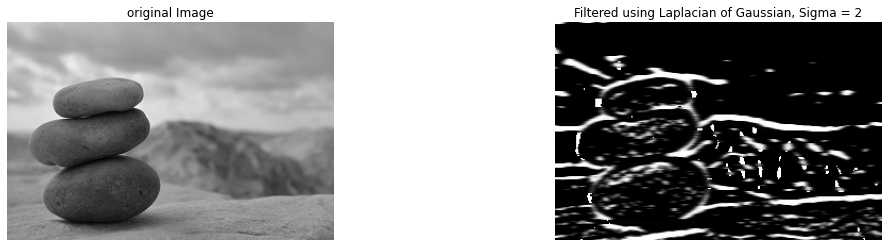

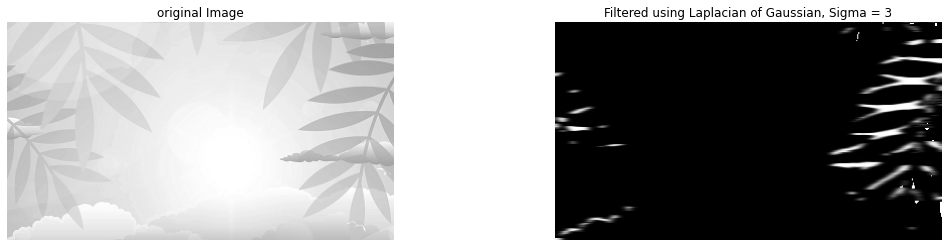

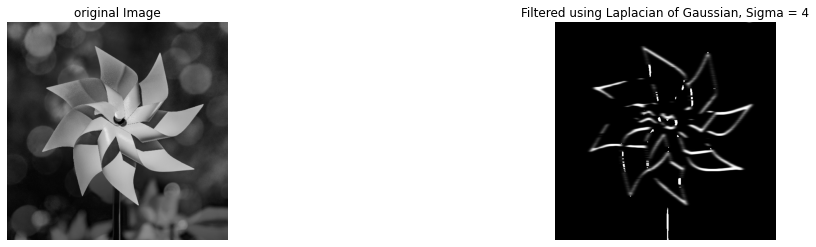

In [11]:
#Task 2.6.2 solution:Apply Laplacian of Gaussian, compute laplacian magnitude and display the results (original image,filtered images and laplacian magnitude image).
print("\n\nTask 2.6.2 solution:Apply Laplacian of Gaussian, compute laplacian magnitude and display the results (original image,filtered images and laplacian magnitude image).\n\n")

   
for i in range(3): 
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18, 4))
    ax1.imshow(cv.cvtColor(grayscale_images[i+1], cv.COLOR_BGR2RGB))
    ax1.set_title("original Image")
    ax1.axis('off')
    
    ax2.imshow(gaussian_laplace(grayscale_images[i+1], sigma=2+i),cmap='gray')
    ax2.set_title("Filtered using Laplacian of Gaussian, Sigma = %i" % (2+i))
    ax2.axis('off')
plt.show()

***
**Task 2.6.3:Apply Canny Edge Detector and display the results.**
    
***



Task 2.6.3:Apply Canny Edge Detector and display the results.




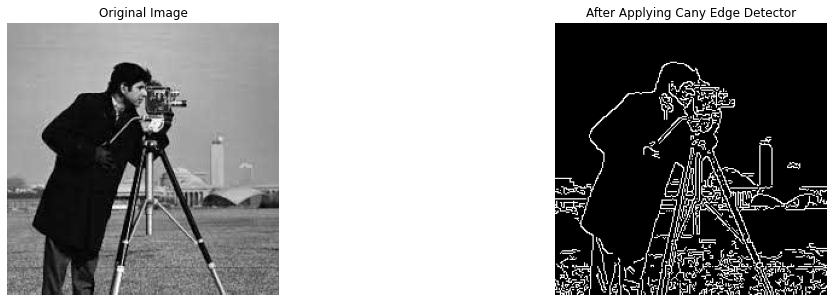

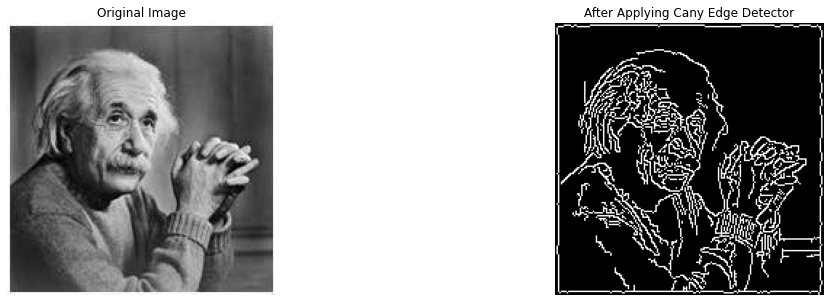

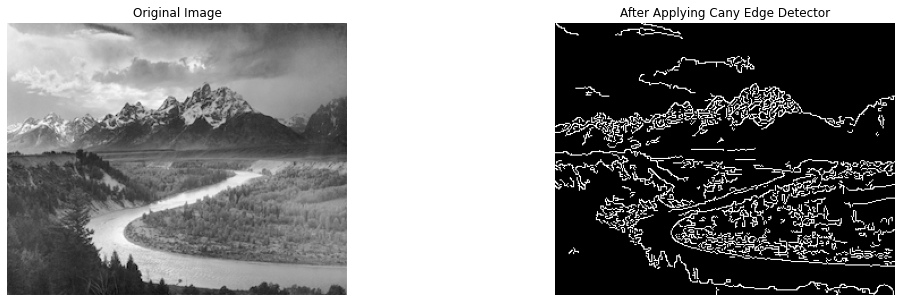

In [12]:
#Task 2.6.3 solution:Apply Canny Edge Detector and display the results.
print("\n\nTask 2.6.3:Apply Canny Edge Detector and display the results.\n\n")

for i in range(3):    
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18, 5))
    ax1.imshow(grayscale_images[i+5],cmap='gray')
    ax1.set_title("Original Image")
    ax1.axis('off')
    
    ax2.imshow(cv.Canny(grayscale_images[i+5],100,200),cmap='gray')
    ax2.set_title("After Applying Cany Edge Detector")
    ax2.axis('off')
plt.show()
